In [1]:
# ================================================================
#  Importing the necessary libraries
# ================================================================
import numpy as np
import matplotlib.pyplot as plt
import coupled_oscillator as co


def run_experiment(gravity: callable, ramp_period: float, title: str):
    """
    System evolution with ramped gravity
    
    We consider the evolution of an harmonic oscillator with the frequency

    .. math::
        \omega(t) = \sqrt{g(t)/l}

    where :math:`g(t)` is the gravity and :math:`l` is the length of the pendulum.
    We modify the gravity and observe the evolution of the system, i.e. changes
    in frequency and amplitude.

    Parameters
    ----------
    gravity : callable
        The gravity function that depends on time
    ramp_period : float
        The time it takes to ramp down the gravity to zero
    """
    # ================================================================
    #  Setting up the system
    # ================================================================
    # we only consider the pendulum for now and disable the spring
    # so the gravity and spring length are the only important parameters
    length = 1
    epsilon = 0  # uncoupled oscillator
    osc_prop = co.OscillatorProperties(
        gravity=gravity, length=length, epsilon=epsilon)
    # We use the approximated Hamiltonian for the system, since it is linear
    hamiltonian = co.HamiltonianApprox(osc_prop)  # This defines the system of equations

    # ================================================================
    #  Defining the initial conditions
    # ================================================================
    angle_deg = -45
    angle_rad = np.deg2rad(angle_deg)
    angle_momentum = 1
    phase_ini = co.Phase(osc_prop, angle=angle_rad, angle_momentum=angle_momentum)

    # ================================================================
    #  Solving the system
    # ================================================================

    evolution = co.solve(
        hamiltonian=hamiltonian, 
        phase=phase_ini,
        num_points=1000,
        max_step=0.1,
        time_span=[0, ramp_period])

    print(f"Ramp period is {ramp_period}")
    print(f"Final gravity is {gravity(ramp_period)}")
    print(f"Final angle momentum is {evolution.isel(time=-1).angle_momentum.item()}")

    # ================================================================
    #  Plot the results
    # ================================================================
    fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True, tight_layout=True)

    # Plot the angle and angle momentum
    evolution.angle.plot(ax=axs[0])
    evolution.angle_momentum.plot(ax=axs[1])
    # Plot the gravity
    axs[2].plot(evolution.time, gravity(evolution.time))
    axs[2].set_ylabel("Gravity")
    axs[2].set_xlabel("time [s]")

    for ax in axs:
        ax.grid(True, linestyle="--", alpha=0.5)
        ax.axhline(0, color='black', lw=0.5)
        ax.set_xlim(0, ramp_period)
    fig.suptitle(title, fontsize=16)

<>:10: SyntaxWarning: invalid escape sequence '\o'
<>:10: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_22842/1431521738.py:10: SyntaxWarning: invalid escape sequence '\o'
  """


Ramp period is 282.74333882308144
Final gravity is 9.999999999999992e-05
Final angle momentum is -0.07749999952852413


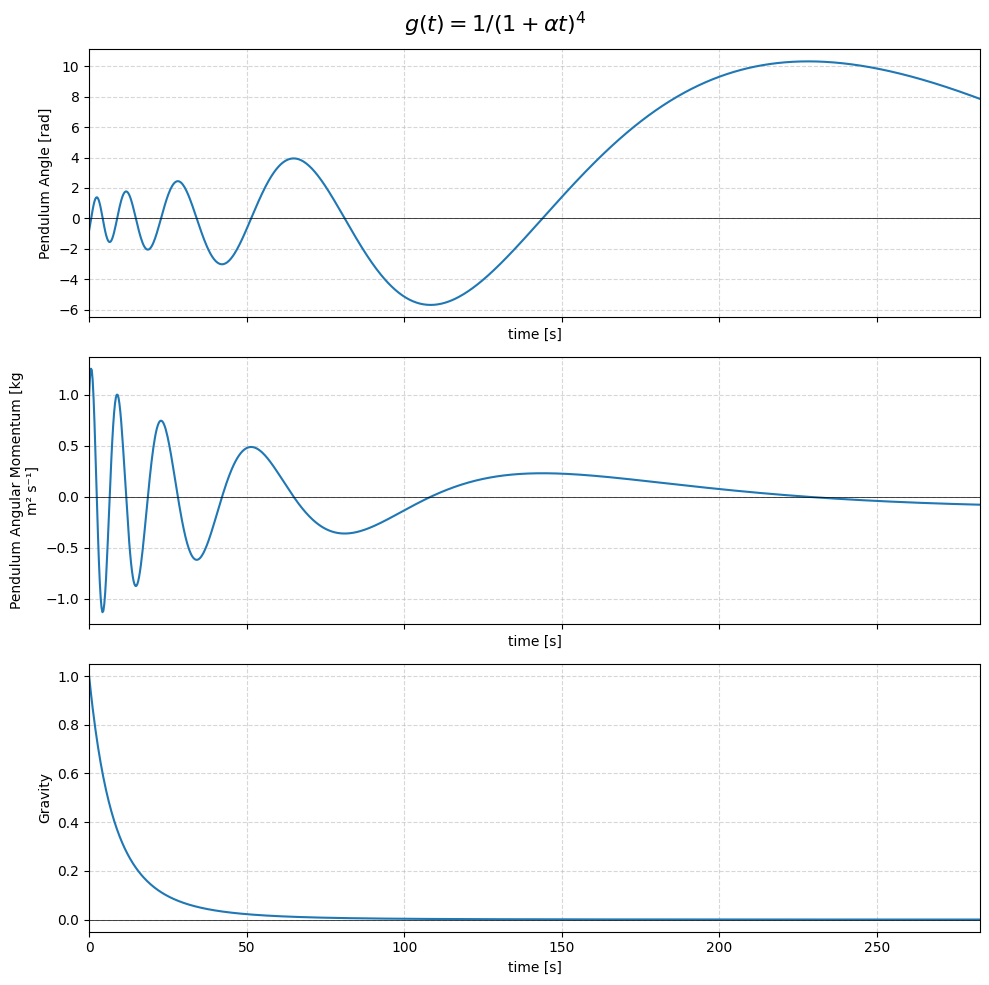

In [2]:
n = 5  # The number of oscillations until the system is freezed
final_phase = 2 * np.pi * n
α = 1 / final_phase
# The final phase may only be reached after an infinite time
# so we want to stop the ramping a bit earlier
# We introduce the scaling factor γ, so that the ramping stops at the phase
# phase = γ * final_phase
γ = 0.9
ramp_period = γ / (1 - γ) / α
gravity = lambda t: 1 / (1 + α * t) ** 4

run_experiment(gravity, ramp_period, r"$g(t)=1/(1+αt)^4$")

Ramp period is 300
Final gravity is 4.5399929762484854e-05
Final angle momentum is -0.046460222974875676


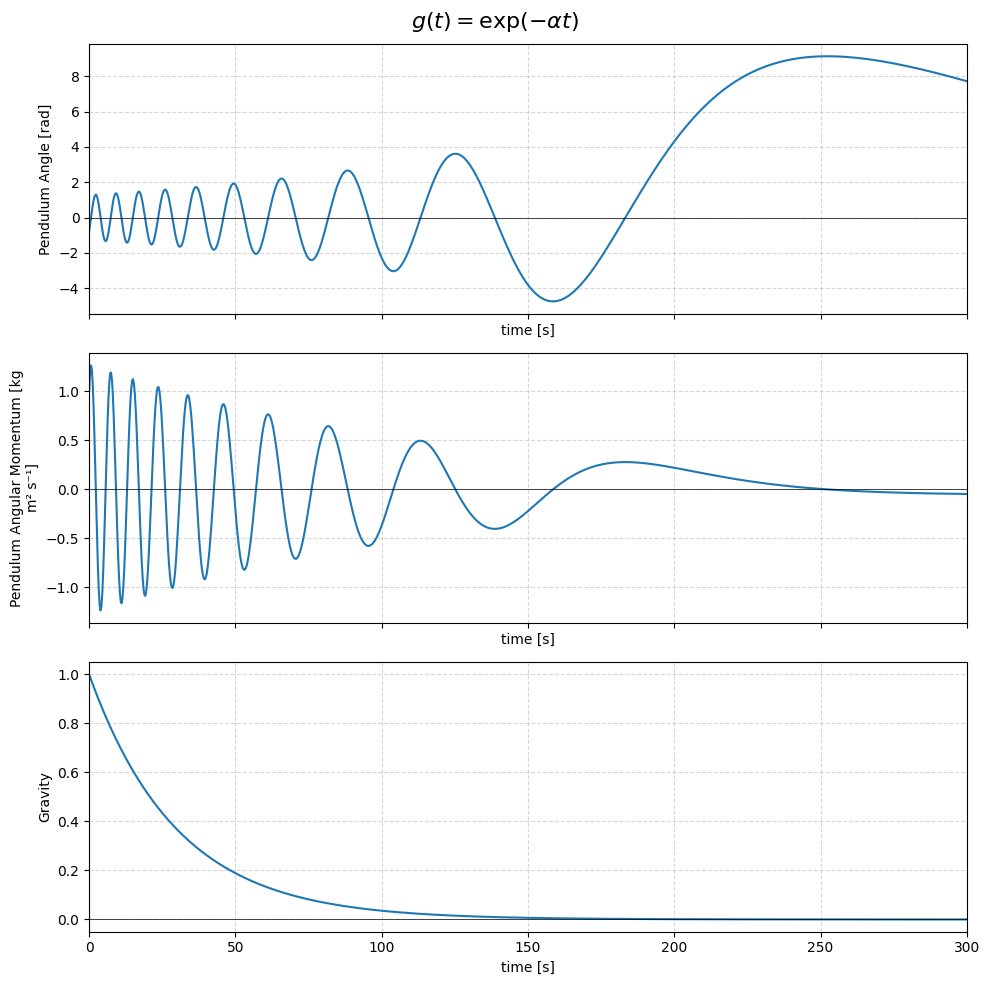

In [3]:
ramp_period = 300  # The time it takes to ramp down the coupling to zero
gravity = lambda t: np.exp(- 10 * t/ramp_period)

run_experiment(gravity, ramp_period, r"$g(t)=\exp(-αt)$")

Ramp period is 300
Final gravity is 0.0
Final angle momentum is -0.19914653575029742


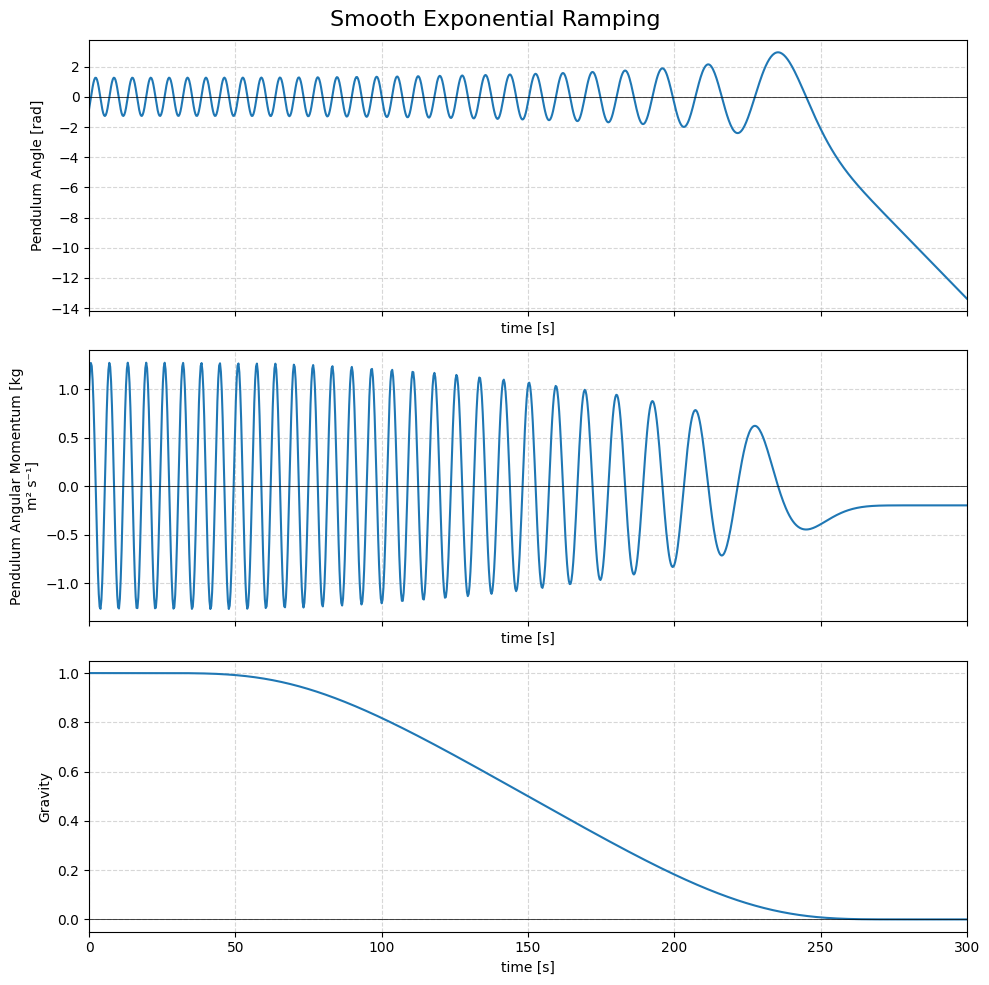

In [4]:
ramp_period = 300  # The time it takes to ramp down the coupling to zero
gravity = co.ramp_functions.Exponential(
    start_time=0, period=ramp_period, start_value=1, end_value=0)

run_experiment(gravity, ramp_period, "Smooth Exponential Ramping")